<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import re

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
# Скачать и распаковать в data/
# https://drive.google.com/file/d/1Kb78mAWYKcYlellTGhIjPI-bCcKbGuTn/view?usp=sharing

data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
print('Размерность таблицы:', data.shape)

Размерность таблицы: (44744, 12)


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
#data.head(5)
data.tail(5)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [5]:
print('Выберите все признаки, у которых есть пропуски в данных')
cols_null_percent = data.isnull().mean()*100
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)
print(cols_with_null)

Выберите все признаки, у которых есть пропуски в данных
Опыт работы                        0.375469
Последняя/нынешняя должность       0.004470
Последнее/нынешнее место работы    0.002235
dtype: float64


5. Выведите основную статистическую информацию о столбцах.


In [6]:
display(data.describe())

print('Сколько уникальных значений содержится в столбце «Опыт работы»?', data['Опыт работы'].nunique())
# Ответ: 44413

print('Какая из искомых должностей самая распространённая?', data['Ищет работу на должность:'].mode())
# Ответ: Системный администратор

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


Сколько уникальных значений содержится в столбце «Опыт работы»? 44413
Какая из искомых должностей самая распространённая? 0    Системный администратор
Name: Ищет работу на должность:, dtype: object


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [7]:
def education_level(value):
    values = value.strip().lower().split(' ')
    
    if values[1] != 'образование':
        return ' '.join(values[0:2]) # Интересуют только первые 2 слова
    else:
        return values[0] # Исключить слово 'образование' и результирующего значения

data['Образование'] = data['Образование и ВУЗ'].apply(education_level)
data.drop(columns='Образование и ВУЗ', inplace=True)

print('Сколько соискателей имеет средний уровень образования (школьное образование)?', data[data['Образование'] == 'среднее'].shape[0]) 
# Ответ: 559

Сколько соискателей имеет средний уровень образования (школьное образование)? 559


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [8]:
# Чтобы выделить пол, достаточно взять первую букву
data['Пол'] = data['Пол, возраст'].apply(lambda val: val[0].upper()).astype('category')
# Разбить строку по запятым, взять из второй части возраст и преобразовать его к целому
data['Возраст'] = data['Пол, возраст'].apply(lambda val: val.split(',')[1].strip().split(' ')[0]).astype(np.int64)
data.drop(columns='Пол, возраст', inplace=True)

print('Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых.', round(data['Пол'].value_counts(normalize=True)['Ж'], 4) * 100)
# Ответ: 19.07
print('Чему равен средний возраст соискателей? Ответ округлите до десятых.', round(data['Возраст'].mean(), 1))
# Ответ: 32.2

Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых. 19.07
Чему равен средний возраст соискателей? Ответ округлите до десятых. 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [9]:
def work_exp(value):
    if value and value == value: # в value что-то есть и оно не NaN (Nan != Nan)
        m = re.match(r'(?iu)опыт работы:?(\s*(?P<years>\d+)\s+(года?|лет))?(\s*(?P<months>\d+)\s+месяц)?.*', value)
        if m:
            years, months = m['years'], m['months']
            months = int(months) if months else 0
            years = int(years) if years else 0            
            return years*12 + months
    return np.nan
data['Опыт работы (месяц)'] = data['Опыт работы'].apply(work_exp)
data = data.drop(columns=['Опыт работы'])

print('Чему равен медианный опыт работы (в месяцах) в нашей таблице?', data['Опыт работы (месяц)'].median())
# Ответ: 100

Чему равен медианный опыт работы (в месяцах) в нашей таблице? 100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [10]:
def city_move_btrip(value):
    city, move, btrip = np.nan, np.nan, False # Если после преобразования в таблице будут NaN, то функция работает неправильно
    if value and value == value:
        cities = ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 
                  'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
        # Город есть всегда и он сначала строки
        city = value.split(',')[0].strip()
        city = city if city in cities else 'другие'
        # Искать маркеры 'готов|не готов|готова|не готова|хочу', чтобы определить готовность к перезду
        m = re.search('(?iu)(не)?\s*(готова?|хочу)', value)
        if m:
            move = not value[m.start():].lower().startswith('не')
            value = value[m.end():]
            # Если в оставшейся строке есть еще маркеры, то они относятся к готовности к командировкам
            m = re.search('(?iu)(не)?\s*готова?', value)
            if m:
                value = value[m.start():]
                btrip = not value.lower().startswith('не')
    # Вернуть город, готовность к переезду и готовность к командировкам одной серией       
    return pd.Series([city, move, btrip])

data[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = data['Город, переезд, командировки'].apply(city_move_btrip)
data.drop(columns='Город, переезд, командировки', inplace=True)

print('Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.', 
      round(data['Город'].value_counts(normalize=True)['Санкт-Петербург']*100))
# Ответ: 11
mask1 = data['Готовность к переезду'] == True
mask2 = data['Готовность к командировкам'] == True
print('Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.', 
      round(data[mask1 & mask2].shape[0] / data.shape[0] * 100))
# Ответ: 32

#data.to_csv('data/data_bak1.csv', index=False)
#data = pd.read_csv('data/data_bak1.csv')

Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого. 11
Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого. 32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [11]:
def split_feature(df, feature, sep=','):
    # Для выбранного признака таблицы найти все уникальные значения, записанные в этом признаке через разделитель
    unique_values = set([val.strip() for sublist in df[feature].dropna().str.split(sep) for val in sublist])
    # Для каждого уникального значения создать отдельный признак с True, если series содержит это значение, и False в противном случае
    for unique in unique_values:
        df[unique] = df[feature].apply(lambda val: unique in val)
    
split_feature(data, 'Занятость')
split_feature(data, 'График')
data.drop(columns=['Занятость', 'График'], inplace=True)

print('Сколько людей ищут проектную работу и волонтёрство', data[data['проектная работа'] & data['волонтерство']].shape[0])
# Ответ: 436
print('Сколько людей хотят работать вахтовым методом и с гибким графиком', data[data['вахтовый метод'] & data['гибкий график']].shape[0])
# Ответ: 2311

Сколько людей ищут проектную работу и волонтёрство 436
Сколько людей хотят работать вахтовым методом и с гибким графиком 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [12]:
#data.to_csv('data/data_bak2.csv', index=False)
#data = pd.read_csv('data/data_bak2.csv')

# Скачать и распаковать в data/
# https://lms.skillfactory.ru/assets/courseware/v1/15abf80f45a2f3e93c3274101b451c67/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/ExchangeRates.zip

rates = pd.read_csv('data/ExchangeRates.csv')

rates['date'] = pd.to_datetime(rates['date']).dt.date
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме']).dt.date

# Словарь подстановок
currency_subst = {
    'грн': ('UAH', 10),
    'USD': ('USD', 1),
    'EUR': ('EUR', 1),
    'белруб': ('BYN', 1),
    'KGS': ('KGS', 10),
    'сум': ('UZS', 10000),
    'AZN': ('AZN', 1),
    'KZT': ('KZT', 100)   
}

def parse_salary(value):
    """
    Функция разбора строк с желаемой зарплатой, выделения из них суммы и ISO-кода валюты
    """
    # Выделить из зарплаты сумму и валюту
    amount, currency = tuple(value.split(' '))
    # Сумму в число
    amount = int(amount.strip())
    # удалить из валюты лишние символы
    currency_clear = re.sub(r'(?iu)[^a-zа-я]', '', currency).strip()
    
    if currency_clear in currency_subst:
        # Вернуть сумму, ISO код валюты и пропорцию
        iso, proportion = currency_subst[currency_clear]
    else:
        # Если валюты нет в словаре, то вернуть "как есть". Очевидно, это рубли
        iso, proportion = currency, 1
    # Вернуть серию, чтобы одним проходом сформировать несколько новых столбцов в таблице
    return pd.Series([amount, iso, proportion]) 


def salary_to_rur(amount, close, proportion):
    """
    Вычисление зарплаты в рублях
    """
    close = close if close and close == close else 1
    proportion = proportion if proportion and proportion == proportion else 1
    return amount * close / proportion
       
        
data[['ЗП (Сумма)', 'ЗП (ISO)', 'ЗП (Пропорция)']] = data['ЗП'].apply(parse_salary)       
# Присоединить курсы по ISO коду валюты и дате
data = data.merge(rates[['currency', 'date', 'close']], how='left',  left_on=['ЗП (ISO)', 'Обновление резюме'], right_on=['currency', 'date'])
# Рассчитать зарплату в рублях, учитывая отсутствующие данные
data['ЗП (руб)'] = data.apply(lambda df: salary_to_rur(df['ЗП (Сумма)'], df['close'], df['ЗП (Пропорция)']), axis=1)
data.drop(columns=['ЗП', 'ЗП (Сумма)', 'ЗП (ISO)', 'ЗП (Пропорция)', 'currency', 'date', 'close'], inplace=True)

# Медианная зарплата в рублях
print('Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?', round(data['ЗП (руб)'].median()/1000))
# Ответ: 59

#data.to_csv('data/data_bak3.csv', index=False)
#data = pd.read_csv('data/data_bak3.csv')

Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)? 59


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

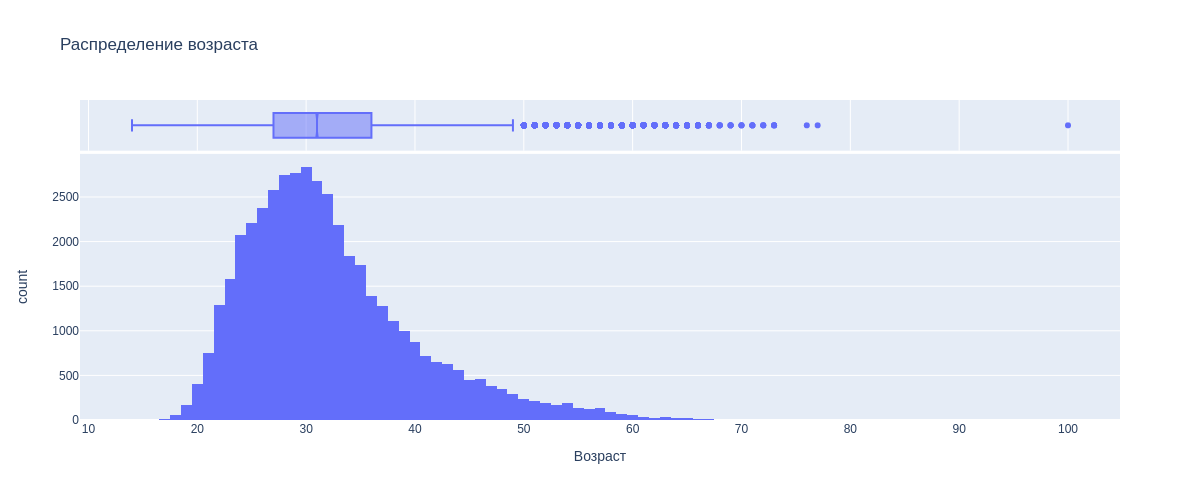

In [13]:
fig = px.histogram(data, x='Возраст', title='Распределение возраста', marginal='box', width=1200)
fig.show('png')

Мода распределения - 30 лет, предельные значения возраста - от 14 до 100 лет, большинство из которых находятся в примерном диапазоне от 27 до 36 лет.
Аномальные значение присутствуют и находятся в интервале от 50 лет до 73 лет, их следует дополнительно проверить. От аномалий 76, 77 и 100 лет необходимо избавиться.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

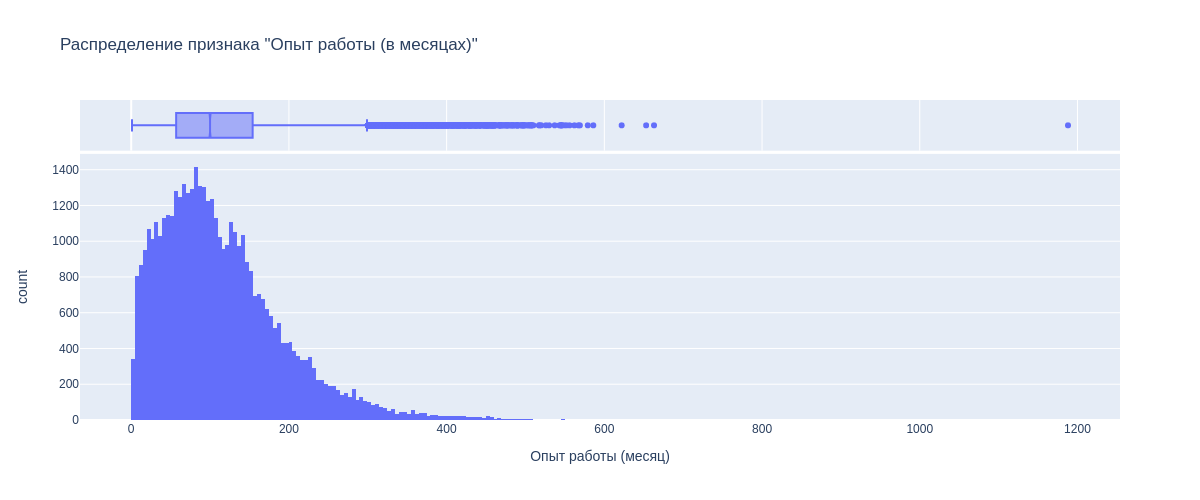

In [14]:
fig = px.histogram(data, x='Опыт работы (месяц)', title='Распределение признака "Опыт работы (в месяцах)"', marginal='box', width=1200)
fig.show('png')

Мода распределения - 80-84 месяца, предельные значения - от 1 до 1188 месяцев, большинство из которых находятся в примерном диапазоне от 57 до 154 месяцев. Аномальные значения присутствуют и находятся в интервале от 300 до 663 месяцев. Аномалия 1188 месяцев должна быть исключена.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


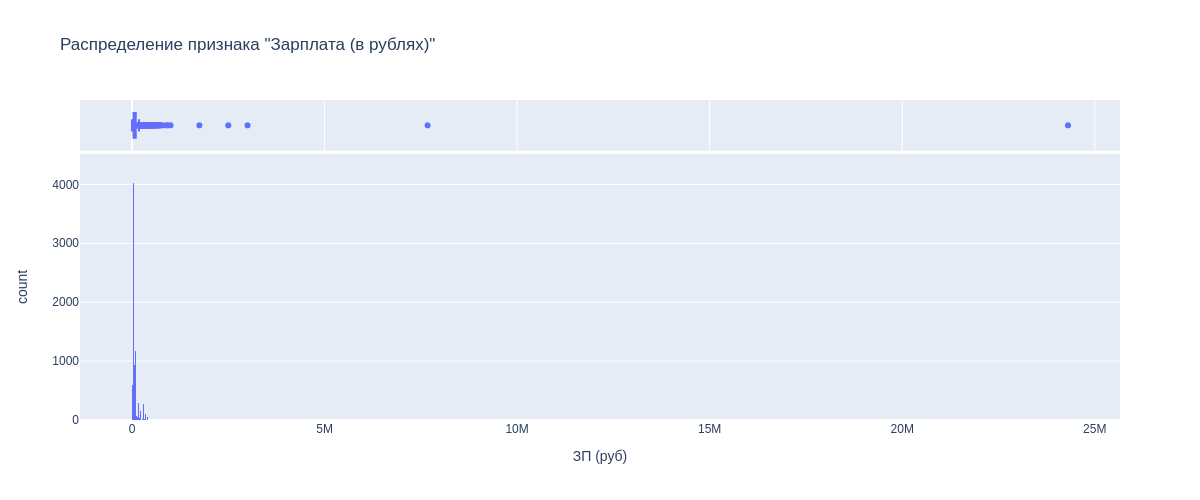

Сколько соискателей требуют заработную плату выше 1 миллиона рублей 5


In [15]:
fig = px.histogram(data, x='ЗП (руб)', title='Распределение признака "Зарплата (в рублях)"', marginal='box', width=1200)
fig.show('png')
print('Сколько соискателей требуют заработную плату выше 1 миллиона рублей', data[data['ЗП (руб)'] > 1_000_000].shape[0])
# Ответ: 5

Мода распределения - 47.5 тыс.руб. - 52.5 тыс.руб., предельные значения - от 1 руб. до 24.3 млн.руб., большинство из которых находятся в примерном диапазоне от 37 тыс.руб. до 95 тыс.руб. 

Аномальные значения присутствуют и находятся в интервале от 182.5 тыс.руб до 24.3 млн.руб. 
 * Аномальные значения от 182.5 тыс.руб. до 400 тыс.руб. вероятнее всего не являются таковыми и должны быть оставлены в наборе и исследованы.
 * Аномалии от 1 млн.руб. являются единичными случаями и могут быть исключены.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

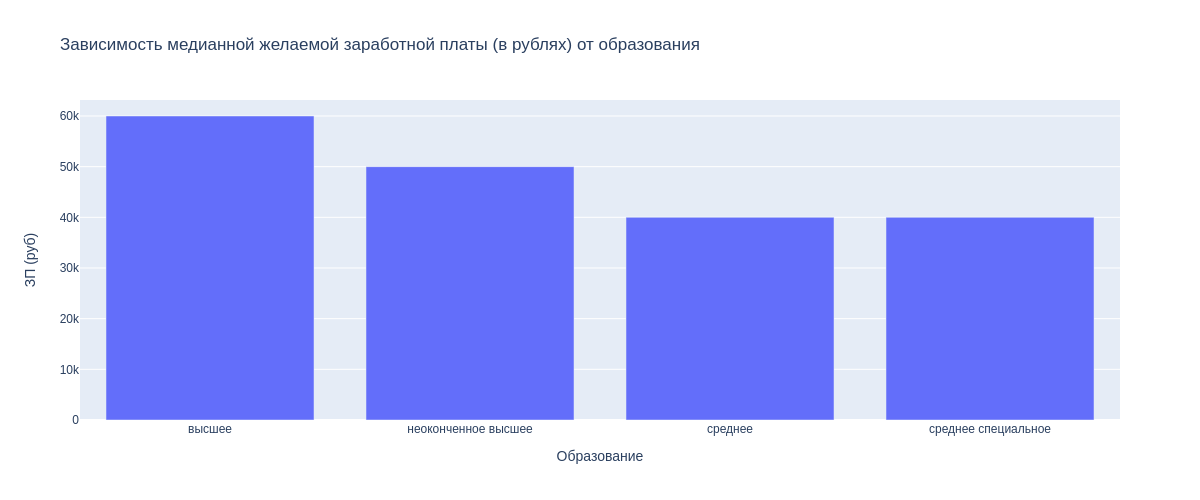

In [16]:
plot_data = data[data['ЗП (руб)'] < 1_000_000].groupby('Образование', as_index=False).median()
fig = px.bar(plot_data, x='Образование', y='ЗП (руб)', title='Зависимость медианной желаемой заработной платы (в рублях) от образования', width=1200)
fig.show('png')

Наибольший уровень желаемой заработной платы находится в категории **высшее** образование 60 тыс.руб., наименьший - в категориях **среднее** и **среднее специальное** 40 тыс.руб.
Очевидно, что уровень образования сильно влияет на уровень желаемой заработной платы.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

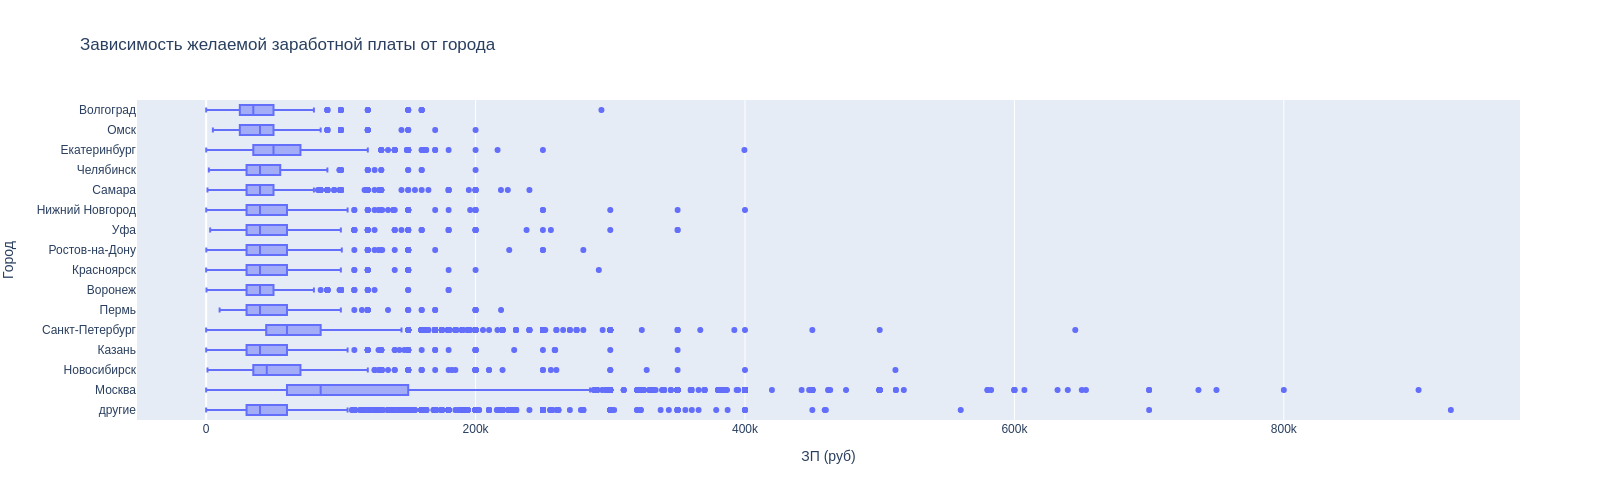

33449    другие
Name: Город, dtype: object

In [17]:
plot_data = data[data['ЗП (руб)'] < 1_000_000]
fig = px.box(plot_data, y='Город', x='ЗП (руб)', title='Зависимость желаемой заработной платы от города', width=1600)
fig.show('png')

# В каком городе (категории городов) зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей)?
display(plot_data[plot_data['ЗП (руб)'] > 900_000]['Город'])
# Ответ: другие

Наибольшие медианные уровни желаемой заработной платы у двух столиц: Москва (85 тыс.руб.) и Санкт-Петербург (60 тыс.руб.). Максимальный размах показателя - в Москве (60-150 тыс.руб.) и Санкт-Петербурге (45-85 тыс.руб.). В остальных городах, включая города-миллионники, медианные значения и размахи имеют примерно одинаковые значения.

При прогнозировании заработной платы важно учитывать только Москву и Санкт-Петербург, возможно еще Екатеринбург и Новосибирск. Для остальных городов уровень желаемой заработной платы находится примерно на одном уровне и может не учитываться.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

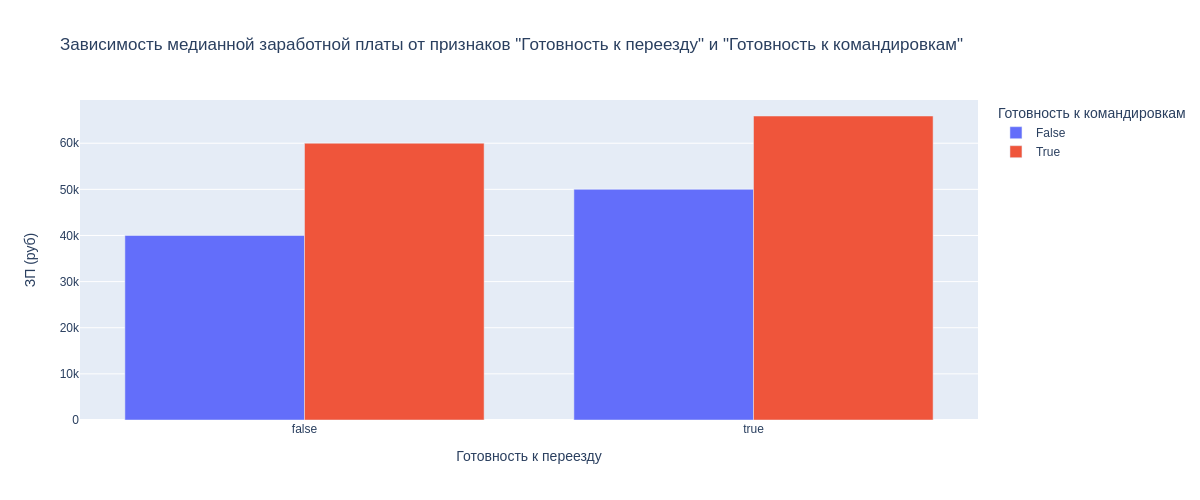

In [19]:
plot_data = data.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()
fig = px.bar(plot_data, y='ЗП (руб)', x='Готовность к переезду', color='Готовность к командировкам', barmode='group', width=1200,
             title='Зависимость медианной заработной платы от признаков "Готовность к переезду" и "Готовность к командировкам"')
fig.show('png')

Наибольшее медианное значение желаемой заработной платы (65.9 тыс.руб.) у соискателей, готовых как к перезду, так и к командировками. Следом (60 тыс.руб.) идут соискатели по-прежнему готовые к командировкам, но не готовые переезжать. Минимальное значение (40 тыс.руб.) у соискателей, не готовых ни к переезду, ни к командировкам. Чуть выше (50 тыс.руб.) - готовы переезжать, но не готовы к командировкам. Вывод: Показатель готовности к командировкам в значительно большей степени влияет на желаемый уровень зарплаты, чем готовность переезжать.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

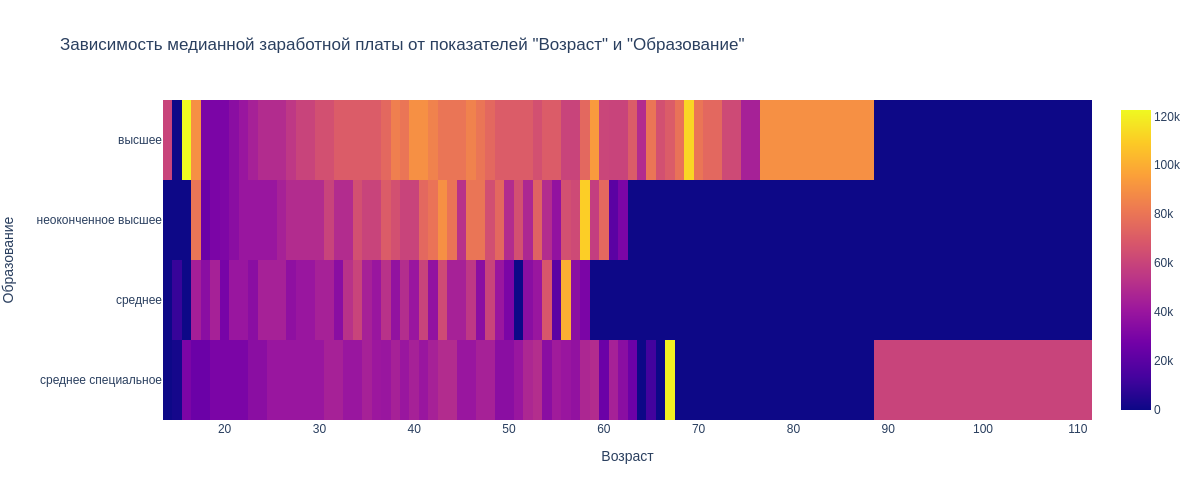

In [20]:
pivot = pd.pivot_table(data, index='Образование', columns='Возраст', values='ЗП (руб)', aggfunc='median', fill_value=0)
fig = px.imshow(pivot, title='Зависимость медианной заработной платы от показателей "Возраст" и "Образование"', width=1200)
fig.show('png')

#display(data[(data['Образование'] == 'среднее специальное') & (data['ЗП (руб)'] < 50_000)]
#        .groupby('Ищет работу на должность:')['ЗП (руб)'].median().sort_values(ascending=False)
#        .head(15))
#display(data[(data['Образование'] == 'среднее') & (data['ЗП (руб)'] < 50_000)]
#        .groupby('Ищет работу на должность:')['ЗП (руб)'].median().sort_values(ascending=False)
#        .head(15))

Наибольший уровень желаемой зарплаты (122.5 тыс.руб.) наблюдается у 16-летних с высшим образованием, что говорит о недостоверных данных, и у 67-летних со средним специальным образованием (120 тыс.руб.), что тоже, скорее всего, является ошибкой. Резюме 100-летнего Frontend-разработчика необходимо исключить из набора данных.

Выводы:
* У претендентов с высшим образованием уровень желаемых зарплат ожидаемо выше остальных и интенсивней остальных растет с возрастом, что говорит о накоплении опыта и высоких занимаемых должностях (диплом позволяет);
* У претендентов с незакоченным высшим образованием график похож на предыдущий, но чуть более неоднородный. Тоже прослеживается зависимость от опыта и, начиная с 37 лет, график становится почти похож на предыдущий. Чуть меньший уровень зарплат, вероятно, из-за невозможности занимать должности, требующие наличие диплома о законченном высшем образовании;
* Уровень желаемых зарплат в категории "среднее специальное" образование ниже предыдущих двух (25-45 тыс.руб.) для всех возрастов. Это люди, не обязательно работающие по специальности - операторы пк, техподдержки, помощники, начинающие специалисты...;
* Уровень желаемых зарплат в категории "среднее" образование очень неоднородный, немного растет с возрастом.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

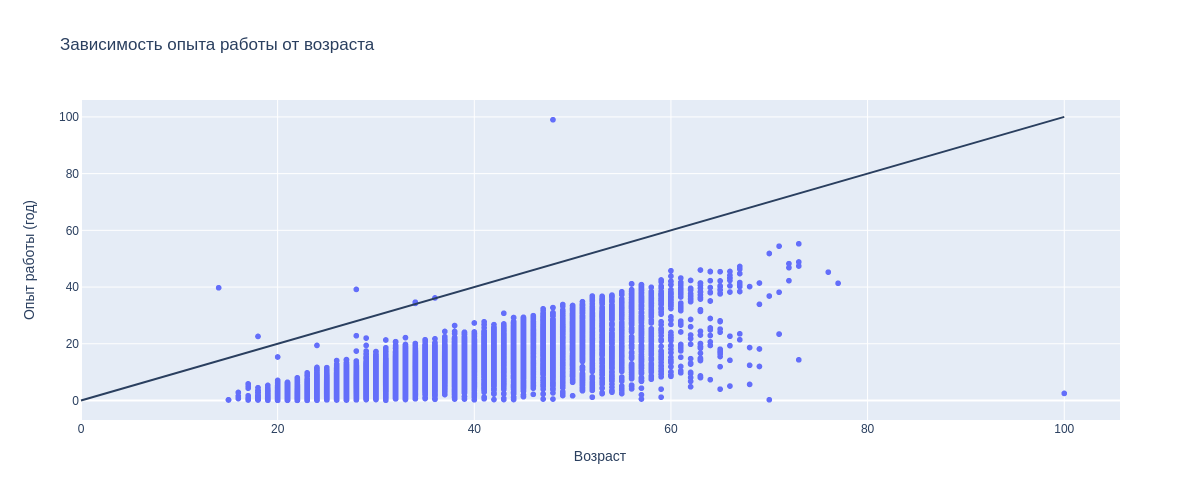

In [21]:
plot_data = data.copy()
plot_data['Опыт работы (год)'] = plot_data['Опыт работы (месяц)'].apply(lambda val: val / 12)

fig = px.scatter(plot_data, x='Возраст', y='Опыт работы (год)', width=1200,
                 title='Зависимость опыта работы от возраста')
fig.add_shape(type="line", x0=0, y0=0, x1=100, y1=100)
fig.show('png')


Большинство показаний находятся ниже прямой, их верхние предельные значения растут согласно этой прямой и показывают разницу между возрастом и опытом 15-17 лет.
На самой прямой 3 точки и еще 4 выше нее, что говорит о неверных данных в резюме.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


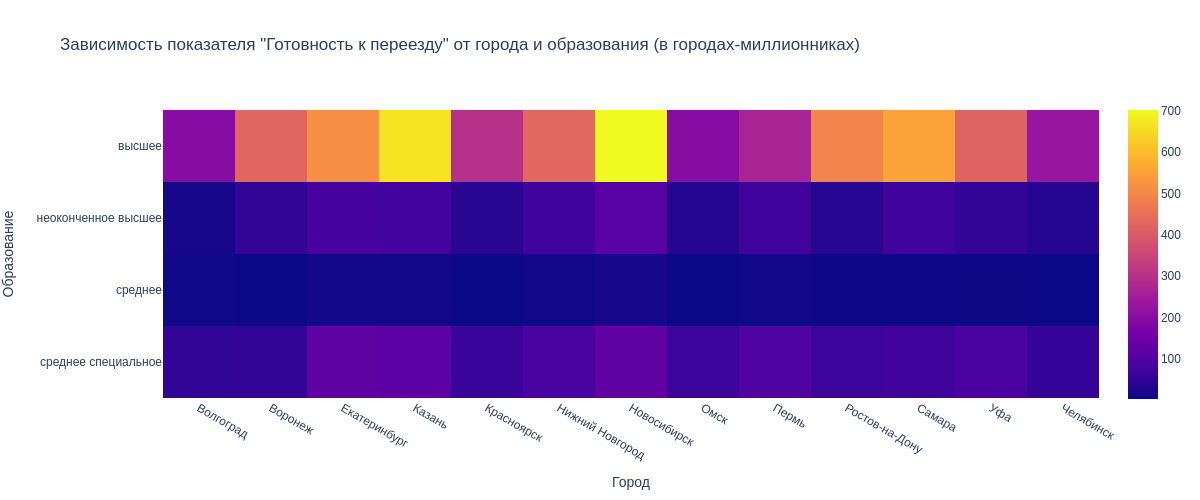

In [22]:
mask1 = data['Город'] != 'Москва'
mask2 = data['Город'] != 'Санкт-Петербург'
mask3 = data['Город'] != 'другие'

pivot = pd.pivot_table(data[mask1 & mask2 & mask3], columns='Город', index='Образование', values='Готовность к переезду', aggfunc='count')
fig = px.imshow(pivot, title='Зависимость показателя "Готовность к переезду" от города и образования (в городах-миллионниках)', width=1200)
fig.show('png')

Взаимосвязь между готовностью к переезду, городом и уровнем образования соискателей показывает, что большое количество людей с высшим образованием готовы переехать из Казани и Новосибирска. Разницы в желании переехать между соискателями с незаконченным высшим и средним специальным образованием почти нет.

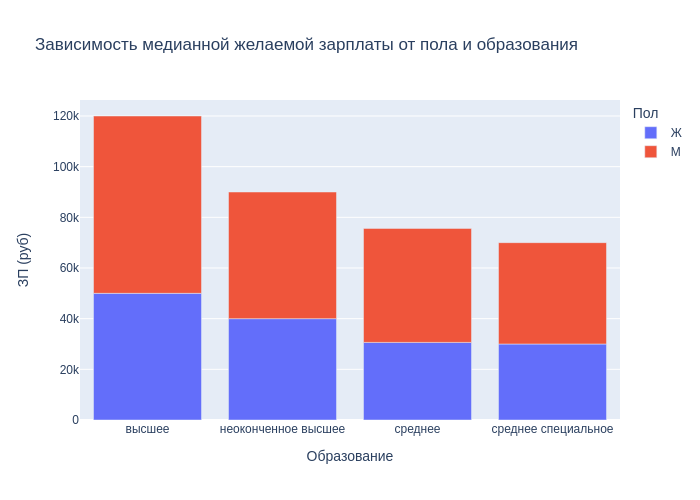

In [23]:
plot_data = data.groupby(['Пол', 'Образование'], as_index=False)['ЗП (руб)'].median()
fig = px.bar(plot_data, x='Образование', y='ЗП (руб)', color='Пол', 
             title='Зависимость медианной желаемой зарплаты от пола и образования')
fig.show('png')

Медианная зарплата женщин более чем вдвое ниже, чем у мужчин, независимо от образования.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [24]:
#data.to_csv('data/data_bak4.csv', index=False)
#data = pd.read_csv('data/data_bak4.csv')

mask = data.duplicated(subset=data.columns)
print(f'Найдено {data[mask].shape[0]} дубликатов')
data = data.drop_duplicates(subset=data.columns)

Найдено 161 дубликатов


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [25]:
mask = data.isnull().sum()
print('Пропуски в столбцах')
print(mask[mask > 0])

Пропуски в столбцах
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
dtype: int64


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [26]:
#data.to_csv('data/data_bak5.csv', index=False)
#data = pd.read_csv('data/data_bak5.csv')

# Удалить строки, где есть пропуск в столбцах с местом работы и должностью
data = data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
# Заполнить медианой пропуски в столбце "Опыт работы (месяц)"
median_value = data['Опыт работы (месяц)'].median()
data['Опыт работы (месяц)'] = data['Опыт работы (месяц)'].fillna(median_value)

print('Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков?', 
      round(data['Опыт работы (месяц)'].mean()))
# Ответ: 114

Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков? 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [27]:
outliers = data[(data['ЗП (руб)'] < 1000) | (data['ЗП (руб)'] > 1_000_000)]
data = data.drop(outliers.index, axis=0)
print('Выбросов найдено:', outliers.shape[0])

Выбросов найдено: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [28]:
outliers = data[data['Опыт работы (месяц)']/12 > data['Возраст']]
data = data.drop(outliers.index, axis=0)
print('Выбросов найдено:', outliers.shape[0])

Выбросов найдено: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Сколько выбросов вы нашли с помощью метода z-отклонений? 3


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,стажировка,проектная работа,полная занятость,волонтерство,удаленная работа,сменный график,полный день,гибкий график,вахтовый метод,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-06-04,Не указано,среднее,М,15,2.0,Санкт-Петербург,...,False,False,False,False,True,True,False,True,False,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-09-04,Не указано,среднее специальное,М,15,3.0,другие,...,False,False,True,False,False,False,True,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,True,False,True,False,True,True,False,60000.0


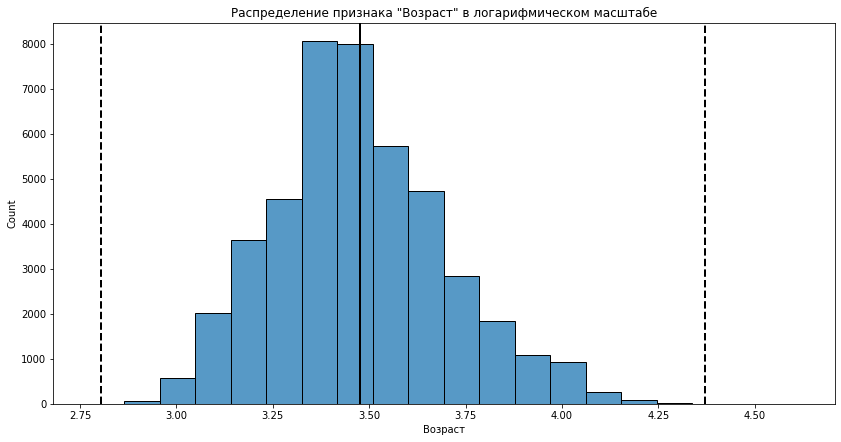

In [29]:
#data.to_csv('data/data_bak6.csv', index=False)
#data = pd.read_csv('data/data_bak6.csv')

# Разделение колонки "Возраст" на выбросы и очищенные данные методом z-отклонений
x = np.log(data['Возраст'] + 1)
mu = x.mean()
sigm = x.std()
lower = mu - 3*sigm
upper = mu + 4*sigm

# Выбросы
outliers = data[(x < lower) | (x > upper)]  
# Очищенные данные
cleaned = data[(x > lower) & (x < upper)]

print('Сколько выбросов вы нашли с помощью метода z-отклонений?', outliers.shape[0])
# Ответ: 3

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
histplot = sns.histplot(x, bins=20, ax=ax)
histplot.axvline(mu, color='k', lw=2)
histplot.axvline(lower, color='k', lw=2, ls='--')
histplot.axvline(upper, color='k', lw=2, ls='--')
title = histplot.set_title('Распределение признака "Возраст" в логарифмическом масштабе')

display(outliers)

#cleaned.to_csv('data/data_bak7.csv', index=False)

Логарифмическое распределение имеет правую асимметрию. Среди выбросов есть 2 резюме 15-летних соискателей и одно резюме 100-летнего Frontend-разрабочтика.
Резюме 100-летнего разработчика с зарплатой 60 тыс.руб. и 15-летнего с зарплатой 2 тыс.руб. необходимо удалить из набора данных, оставшееся - проверить.